In [6]:
#Load libraries
import os
import pandas as pd
import numpy as np
   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [7]:
#Set working directory
os.chdir(r"C:\Users\anupr\Desktop\Two Sigma")

In [8]:
#Load data
marketing_train = pd.read_csv("marketdata.csv")

In [49]:
marketing_train

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1,2606900,32.19,32.17,0.005938,0.005313,-0.001860,0.000622,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0,2051600,11.12,11.08,0.004517,-0.007168,-0.078708,-0.088066,0.027803
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1,1164800,37.51,37.99,-0.011594,0.025648,0.014332,0.045405,0.024433
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1,23747329,84.74,86.23,-0.011548,0.016324,-0.048613,-0.037182,-0.007425
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1,1208600,18.02,18.01,0.011791,0.025043,0.012929,0.020397,-0.017994
5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1,1657300,52.37,52.40,-0.000191,0.008468,0.089000,0.077746,0.058680
6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,0,1186200,23.63,24.13,-0.020721,-0.007404,0.005104,0.026809,-0.044285
7,2007-02-01 22:00:00+00:00,ABM.N,ABM Industries Inc,0,301200,26.19,25.90,0.013545,0.014890,0.068980,0.047311,0.016578
8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,1,5692300,52.87,52.50,-0.002453,-0.004739,0.001515,-0.004928,0.009861
9,2007-02-01 22:00:00+00:00,ABV.N,Companhia de Bebidas das Americas Ambev,1,401800,52.46,52.10,0.014112,0.024784,0.042321,0.027411,0.012917


In [17]:

marketing_train['volume'] = marketing_train['volume'].mean()

In [18]:

marketing_train['volume'].mean()

2980183.0299999975

In [21]:
marketing_train['close']=marketing_train['close'].mean()

In [22]:
marketing_train['close'].mean()

37.709299999999985

In [23]:
marketing_train['open']=marketing_train['open'].mean()

In [24]:
marketing_train['open'].mean()

37.56919999999994

In [25]:
marketing_train['returnsClosePrevRaw1'] = marketing_train['returnsClosePrevRaw1'].mean()

In [26]:
marketing_train['returnsClosePrevRaw1'].mean()

0.008372256619999989

In [27]:
marketing_train['returnsClosePrevRaw10'] = marketing_train['returnsClosePrevRaw10'].mean()

In [28]:
marketing_train['returnsClosePrevRaw10'].mean()

0.02579436858000001

In [29]:
marketing_train['returnsOpenNextMktres10'] = marketing_train['returnsOpenNextMktres10'].mean()

In [30]:
marketing_train['returnsOpenNextMktres10'].mean()

0.011292852369999997

In [9]:
marketing_train.columns

Index(['time', 'assetCode', 'assetName', 'universe', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevRaw10',
       'returnsOpenPrevRaw10', 'returnsOpenNextMktres10'],
      dtype='object')

In [34]:
marketing_train.dtypes

time                        object
assetCode                   object
assetName                   object
universe                     int64
volume                     float64
close                      float64
open                       float64
returnsClosePrevRaw1       float64
returnsOpenPrevRaw1        float64
returnsClosePrevRaw10      float64
returnsOpenPrevRaw10       float64
returnsOpenNextMktres10    float64
dtype: object

In [10]:
marketing_train['close'].value_counts()

34.91     2
17.71     1
29.58     1
36.12     1
10.39     1
26.19     1
84.74     1
20.24     1
62.59     1
32.86     1
55.51     1
27.36     1
14.03     1
38.93     1
26.86     1
33.10     1
24.58     1
66.93     1
29.81     1
13.12     1
35.47     1
17.94     1
40.02     1
21.37     1
23.63     1
49.17     1
66.20     1
38.50     1
48.50     1
63.00     1
         ..
19.99     1
12.84     1
29.36     1
52.87     1
59.04     1
69.49     1
22.32     1
42.83     1
38.70     1
118.21    1
17.77     1
74.71     1
37.51     1
25.87     1
44.87     1
22.94     1
28.77     1
3.17      1
27.06     1
35.86     1
44.26     1
52.37     1
42.28     1
42.43     1
10.83     1
26.32     1
32.80     1
43.70     1
20.65     1
27.25     1
Name: close, Length: 99, dtype: int64

In [11]:
marketing_train.head(5)

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1,2606900,32.19,32.17,0.005938,0.005313,-0.001860,0.000622,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0,2051600,11.12,11.08,0.004517,-0.007168,-0.078708,-0.088066,0.027803
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1,1164800,37.51,37.99,-0.011594,0.025648,0.014332,0.045405,0.024433
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1,23747329,84.74,86.23,-0.011548,0.016324,-0.048613,-0.037182,-0.007425
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1,1208600,18.02,18.01,0.011791,0.025043,0.012929,0.020397,-0.017994


# Feature Selection

In [12]:
#save numeric names
cnames =  ['time', 'assetCode', 'assetName', 'universe', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevRaw10',
       'returnsOpenPrevRaw10', 'returnsOpenNextMktres10']

In [13]:
cnames

['time',
 'assetCode',
 'assetName',
 'universe',
 'volume',
 'close',
 'open',
 'returnsClosePrevRaw1',
 'returnsOpenPrevRaw1',
 'returnsClosePrevRaw10',
 'returnsOpenPrevRaw10',
 'returnsOpenNextMktres10']

In [14]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]

In [55]:
df_corr

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1,2606900,32.19,32.17,0.005938,0.005313,-0.001860,0.000622,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0,2051600,11.12,11.08,0.004517,-0.007168,-0.078708,-0.088066,0.027803
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1,1164800,37.51,37.99,-0.011594,0.025648,0.014332,0.045405,0.024433
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1,23747329,84.74,86.23,-0.011548,0.016324,-0.048613,-0.037182,-0.007425
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1,1208600,18.02,18.01,0.011791,0.025043,0.012929,0.020397,-0.017994
5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1,1657300,52.37,52.40,-0.000191,0.008468,0.089000,0.077746,0.058680
6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,0,1186200,23.63,24.13,-0.020721,-0.007404,0.005104,0.026809,-0.044285
7,2007-02-01 22:00:00+00:00,ABM.N,ABM Industries Inc,0,301200,26.19,25.90,0.013545,0.014890,0.068980,0.047311,0.016578
8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,1,5692300,52.87,52.50,-0.002453,-0.004739,0.001515,-0.004928,0.009861
9,2007-02-01 22:00:00+00:00,ABV.N,Companhia de Bebidas das Americas Ambev,1,401800,52.46,52.10,0.014112,0.024784,0.042321,0.027411,0.012917


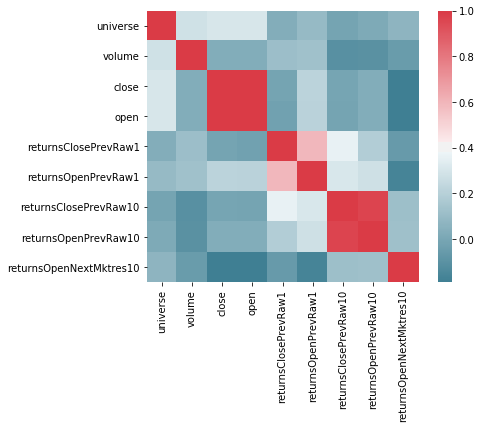

In [15]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Feature Scaling

In [16]:
df = marketing_train.copy()
marketing_train = df.copy()

(array([44., 22., 11.,  8.,  3.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,
         1.]), array([  117700.        ,  1089515.25925926,  2061330.51851852,
         3033145.77777778,  4004961.03703704,  4976776.2962963 ,
         5948591.55555556,  6920406.81481481,  7892222.07407407,
         8864037.33333333,  9835852.59259259, 10807667.85185185,
        11779483.11111111, 12751298.37037037, 13723113.62962963,
        14694928.88888889, 15666744.14814815, 16638559.40740741,
        17610374.66666666, 18582189.92592593, 19554005.18518518,
        20525820.44444444, 21497635.7037037 , 22469450.96296296,
        23441266.22222222, 24413081.48148148, 25384896.74074074,
        26356712.        ]), <a list of 27 Patch objects>)

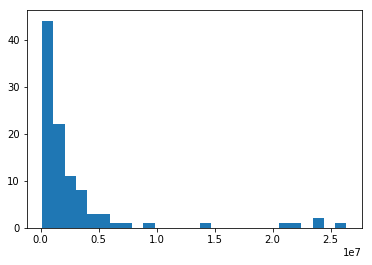

In [17]:
plt.hist(marketing_train['volume'], bins='auto')

In [59]:
cnames

['time',
 'assetCode',
 'assetName',
 'universe',
 'volume',
 'close',
 'open',
 'returnsClosePrevRaw1',
 'returnsOpenPrevRaw1',
 'returnsClosePrevRaw10',
 'returnsOpenPrevRaw10',
 'returnsOpenNextMktres10']

In [18]:
#save numeric names
cnames =  ['universe', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevRaw10',
       'returnsOpenPrevRaw10', 'returnsOpenNextMktres10']

In [19]:
cnames

['universe',
 'volume',
 'close',
 'open',
 'returnsClosePrevRaw1',
 'returnsOpenPrevRaw1',
 'returnsClosePrevRaw10',
 'returnsOpenPrevRaw10',
 'returnsOpenNextMktres10']

In [20]:
#Nomalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

universe
volume
close
open
returnsClosePrevRaw1
returnsOpenPrevRaw1
returnsClosePrevRaw10
returnsOpenPrevRaw10
returnsOpenNextMktres10


In [21]:
 #Standarisation
 for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

universe
volume
close
open
returnsClosePrevRaw1
returnsOpenPrevRaw1
returnsClosePrevRaw10
returnsOpenPrevRaw10
returnsOpenNextMktres10


In [22]:
marketing_train.head(10)

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,0.682556,-0.072664,-0.240709,-0.235442,-0.121948,-0.258895,-0.463382,-0.287599,0.524460
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,-1.450431,-0.180760,-1.159619,-1.155112,-0.193110,-0.862087,-1.751025,-1.861241,0.370375
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,0.682556,-0.353387,-0.008692,0.018350,-1.000046,0.723896,-0.192061,0.507002,0.294768
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,0.682556,4.042582,2.051115,2.121947,-0.997726,0.273274,-1.246771,-0.958375,-0.419885
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,0.682556,-0.344861,-0.858695,-0.852916,0.171239,0.694644,-0.215578,0.063272,-0.656989
5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,0.682556,-0.257516,0.639386,0.646725,-0.428897,-0.106391,1.059065,1.080852,1.063035
6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,-1.450431,-0.349221,-0.614030,-0.586042,-1.457178,-0.873488,-0.346683,0.177042,-1.246757
7,2007-02-01 22:00:00+00:00,ABM.N,ABM Industries Inc,-1.450431,-0.521497,-0.502383,-0.508858,0.259078,0.203989,0.723608,0.540829,0.118556
8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,0.682556,0.527947,0.661192,0.651086,-0.542188,-0.744690,-0.406816,-0.386077,-0.032127
9,2007-02-01 22:00:00+00:00,ABV.N,Companhia de Bebidas das Americas Ambev,0.682556,-0.501914,0.643311,0.633643,0.287469,0.682125,0.276914,0.187728,0.036438


In [23]:
marketing_train['close'].describe()

count    1.000000e+02
mean    -4.496403e-17
std      1.000000e+00
min     -1.506337e+00
25%     -6.809749e-01
50%     -2.084361e-01
75%      4.699526e-01
max      3.510817e+00
Name: close, dtype: float64

In [24]:
 #Standarisation
 for i in cnames:
     print(i)
     marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

universe
volume
close
open
returnsClosePrevRaw1
returnsOpenPrevRaw1
returnsClosePrevRaw10
returnsOpenPrevRaw10
returnsOpenNextMktres10


In [73]:
marketing_train.head(10)

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,0.682556,-0.072664,-0.240709,-0.235442,-0.121948,-0.258895,-0.463382,-0.287599,0.524460
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,-1.450431,-0.180760,-1.159619,-1.155112,-0.193110,-0.862087,-1.751025,-1.861241,0.370375
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,0.682556,-0.353387,-0.008692,0.018350,-1.000046,0.723896,-0.192061,0.507002,0.294768
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,0.682556,4.042582,2.051115,2.121947,-0.997726,0.273274,-1.246771,-0.958375,-0.419885
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,0.682556,-0.344861,-0.858695,-0.852916,0.171239,0.694644,-0.215578,0.063272,-0.656989
5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,0.682556,-0.257516,0.639386,0.646725,-0.428897,-0.106391,1.059065,1.080852,1.063035
6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,-1.450431,-0.349221,-0.614030,-0.586042,-1.457178,-0.873488,-0.346683,0.177042,-1.246757
7,2007-02-01 22:00:00+00:00,ABM.N,ABM Industries Inc,-1.450431,-0.521497,-0.502383,-0.508858,0.259078,0.203989,0.723608,0.540829,0.118556
8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,0.682556,0.527947,0.661192,0.651086,-0.542188,-0.744690,-0.406816,-0.386077,-0.032127
9,2007-02-01 22:00:00+00:00,ABV.N,Companhia de Bebidas das Americas Ambev,0.682556,-0.501914,0.643311,0.633643,0.287469,0.682125,0.276914,0.187728,0.036438


# Decision Tree

In [25]:
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
train = train_test_split(marketing_train, test_size=0.2)

In [ ]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:11], train.iloc[:,11])

#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:9])


# In[ ]:


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [ ]:
MAPE(test.iloc[:,11], predictions_DT)

In [36]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [37]:
#Divide data into train and test
X = marketing_train.values[:, 0:11]
Y = marketing_train.values[:,11]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [38]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

ValueError: could not convert string to float: 'Allergan plc'